In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Khám Phá Dữ Liệu**

In [ ]:
df = pd.read_csv("/content/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.shape

(581012, 55)

Số lượng hàng: 581012 (số lượng mẫu)

Số lượng cột: 55 (bao gồm các thuộc tính và loại cây bao phủ)

Tên các thuộc tính: Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, và các thuộc tính khu vực, loại đất.

In [ ]:
cols = df.columns
cols

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

Khu vực nghiên cứu này bao gồm bốn khu vực hoang dã nằm trong Rừng Quốc gia Roosevelt ở phía bắc Colorado. Những khu vực này đại diện cho những khu rừng ít bị xáo trộn do con người gây ra, do đó các loại độ che phủ rừng hiện tại là kết quả của các quá trình sinh thái hơn là các hoạt động quản lý rừng.

**Thuộc Tính:**

- Elevation (mét): Độ Cao
- Aspect (góc phương vị): Hướng
- Slope (độ): Độ Dóc
- Horizontal_Distance_To_Hydrology (mét): Khoảng cách đến thủy văn (nguồn nước?) theo chiều ngang.
- Vertical_Distance_To_Hydrology (mét): Khoảng cách đến thủy văn (nguồn nước?) theo chiều dọc (độ cao).
- Horizontal_Distance_To_Roadways (mét): Khoảng cách đến đường bộ.
- Hillshade_9am (0 đến 255 trong không gian màu xám): mức độ độ bóng của đồi ở 9 giờ sáng.
- Hillshade_Noon (0 đến 255 trong không gian màu xám): mức độ độ bóng của đồi ở giữa trưa.
- Hillshade_3pm (0 đến 255 trong không gian màu xám): mức độ độ bóng của đồi ở 3 giờ chiều.
- Horizontal_Distance_To_Fire_Points (mét): Khoảng cách đến điểm cháy/ liên quan đến cháy rừng.
- Wilderness_Area1 (bool): Rawah
- Wilderness_Area2 (bool): Neota
- Wilderness_Area3 (bool): Comanche Peak
- Wilderness_Area4 (bool): Cache la Poudre
- Soil_TypeN (bool) : Với giá trị N từ 1 đến 40 thể hiện loại đất được xác định tại khu vực khảo sát.

**Khu vực Rawah**

Rawah Wilderness có độ cao từ 8,400 feet (khoảng 2,560 mét) đến 13,000 feet (khoảng 3,962 mét)2. Những ngọn núi cao này được tạo thành bởi sự xói mòn của sông băng, tạo ra những hồ nước trong lòng núi và những đống đá cuội tuyệt đẹp. Khu vực này chứa nguồn nước của các con suối McIntyre, Rawah và Fall, cũng như sông Laramie3.

Nguồn: https://www.fs.usda.gov/recarea/mbr/recarea/?recid=81025

![Rawah](https://upload.wikimedia.org/wikipedia/commons/c/ce/Rawah_Wilderness.jpg)

**Khu vực Neota**

Khu vực Neota nằm trên huyện rừng Canyon Lakes của Roosevelt National Forest. Độ cao của khu vực Neota dao động từ 10,000 feet (khoảng 3,000 mét) đến 11,896 feet (khoảng 3,626 mét) trong dãy núi Rocky. Có chỉ 1.5 dặm (khoảng 2.4 km) đường mòn trong khu vực này. Khu vực này nằm giữa các dãy núi đá granite có độ cao và không giống như các dãy núi Rockies thường thấy. Phía tây nam của ranh giới khu vực hoang dã, ngọn núi Iron cao 12,265 feet (khoảng 3,738 mét) nhìn ra ba lưu vực chính trong khu vực: Trap, Corral và Neota Creeks.

Nguồn: https://www.fs.usda.gov/recarea/arp/recarea/?recid=80806

![Neota](https://www.fs.usda.gov/Internet/FSE_MEDIA/stelprd3799703.jpg)

**Khu vực Comanche Peak**

Khu vực Comanche Peak nằm trong một khu vực lớn chủ yếu không có đường đi và giáp với Công viên Quốc gia Rocky Mountain phía bắc. Độ cao dao động từ 8.000 đến 12.702 feet và bao gồm các đỉnh núi phẳng bằng đá granite không giống như những dãy núi Rockies có các sườn dốc. Ngay phía tây nam của ranh giới hoang dã, ngọn núi Iron cao 12.265 nhìn ra ba lưu vực chính trong khu vực: Trap, Corral và Neota Creeks

Nguồn: https://peakvisor.com/park/comnche-peak-wilderness-area.html

![Comanche Peak](https://roamingtogether.com/wp-content/uploads/2022/02/51865691097_833ba9198a_c.jpg)

**Khu vực Cache la Poudre**

Độ cao của khu vực này dao động từ 6.100 ft (khoảng 1.859 m) đến 8.300 ft (khoảng 2.530 m) trong dãy núi Rocky. Chỉ có một đường mòn, đường mòn giải trí quốc gia Mount McConnel, tồn tại trong khu vực hoang dã này.

Khu vực hoang dã Cache la Poudre được đặc trưng bởi địa hình gồ ghề, dốc đứng dọc theo con sông Cache la Poudre và nhánh nhỏ phía nam của con sông.

Nguồn: https://www.fs.usda.gov/recarea/arp/recarea/?recid=80801

![Cache la Poudre](https://res.cloudinary.com/simpleview/image/upload/v1525809373/clients/fortcollinsco/Cache_la_Poudre_River_Credit_Ashley_Matthews_752a92e8-6cc7-45ff-bf83-58306b19361c.jpg)

**Theo Mô Tả Đi Kèm Bộ Dữ Liệu**

Neota (khu vực 2) có lẽ có giá trị độ cao trung bình cao nhất trong 4 khu vực hoang dã. Rawah (khu vực 1) và Comanche Peak (khu vực 3) sẽ có giá trị độ cao trung bình thấp hơn, trong khi Cache la Poudre (khu vực 4) sẽ có giá trị độ cao trung bình thấp nhất.

Đối với các loài cây chính ở những khu vực này, Neota sẽ có cây vân sam/linh sam (spruce/fir loại 1), trong khi Rawah và Comanche Peak có thể có cây thông lodgepole (lodgepole pine loại 2) là loài chính, tiếp theo là cây vân sam/linh sam và cây dương (spruce/fir and aspen loại 5). Cache la Poudre có xu hướng có thông Ponderosa (Ponderosa pine loại 3), linh sam Douglas (Douglas-fir loại 6) và gỗ bông/liễu (cottonwood/willow loại 4). Các khu vực Đỉnh Rawah và Comanche có xu hướng điển hình hơn trong bộ dữ liệu tổng thể so với Neota hoặc Cache la Poudre, do sự phân loại các loài cây và phạm vi giá trị biến dự đoán (độ cao, v.v.) Cache la Poudre có thể sẽ là độc đáo hơn những loài khác, do phạm vi độ cao và thành phần loài tương đối thấp.

Các khu vực Comanche Peak và Comanche có xu hướng điển hình hơn trong bộ dữ liệu tổng thể so với Neota hoặc Cache la Poudre, do sự phân loại các loài cây và phạm vi giá trị biến dự đoán (Elevation, v.v.) Cache la Poudre có thể sẽ là độc đáo hơn những loài khác, do phạm vi độ cao và thành phần loài tương đối thấp.

**Kiểm Tra Dữ Liệu**

In [ ]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Ta nhận thấy trước mắt, bộ dữ liệu có thể đang ở trạng thái tốt vì chung ra không thấy giá trị rỗng trong bộ dữ liệu, tuy nhiên có thể thay vì để giá trị rỗng, bộ dữ liệu có thể chứa các giá trị khác để thay thế rỗng (NaN, undefined,...) nên ta sẽ tiến hành kiểm tra các giá trị trong từng cột.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
for col in cols:
  print(df[col].unique())

[2596 2590 2804 ... 3858 3856 3852]
[ 51  56 139 155  45 132  49  59 201 151 134 214 157 259  72   0  38  71
 209 114  54  22 135 163 148 117 122 105 102  23  41 125  92  98 354 347
 346 330 128  68  94  99  66 100 323  79  81 315  74  11  42  75 107  90
  40  63  13  80 166   6  30 118 160 326 153 143 352  14 358 332  18 306
 173  31 164  34  84 170 211  32  57 348 333 324  88 111  53  58  76  17
 124 119 320 112  83   1  37 356 307   7  12 344 228 284 299 220   2  95
 289  21  20 200 349 328 221 257 276 196 189 130 357  15   8 288 129  28
  86 292 115  29 180 116  46 256 338 127 319  89  43 188  50 138 312   9
  10  36 167 260 187 279 245  27 359  16  48 149  60  77 230 152  70 325
 126 222 109  85  25 176 144 175 162  73  39  78 331 329 355  87 285 108
 106  24  52 261 232 246 342  61 141 216 236 254 336 278  62 237 281  69
 251 150 185 110 103 243 215 238 317 252 136 131 133 123 120 351 202 194
 101 282 258 270  65 203 353 174 140 142 267   5 343 104 212 198 263 277
  96 340 217 12

**Đánh Giá**

Tất cả các giá trị của bộ dữ liệu toàn bộ đều là kiểu số, vì vậy ta loại trừ trường hợp trong bộ dữ liệu có giá trị nào khác thay thế giá trị rỗng.

**Trực Quan Hóa**

Để bộ dữ liệu trông trực quan hơn, ta tiến hành gán nhãn cho giá trị Cover_Type

In [ ]:
df['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)
df['Cover_Type']

0                  Aspen
1                  Aspen
2         Lodgepole Pine
3         Lodgepole Pine
4                  Aspen
               ...      
581007    Ponderosa Pine
581008    Ponderosa Pine
581009    Ponderosa Pine
581010    Ponderosa Pine
581011    Ponderosa Pine
Name: Cover_Type, Length: 581012, dtype: object

**Chuyển Các Cột Biến Giả Định Về 1 Cột Duy Nhất**

Ta sẽ kiểm tra xem giá trị Khu Vực và Loại Đất có phải biến giả định hay không, nếu có thì đưa về 1 cột.

In [ ]:
df[['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].apply(lambda row: sum(row) == 1, axis=1).value_counts()

True    581012
dtype: int64

In [ ]:
df['Wilderness_Area'] = ""
df.loc[df['Wilderness_Area1'] == 1, 'Wilderness_Area'] = "Rawah"
df.loc[df['Wilderness_Area2'] == 1, 'Wilderness_Area'] = "Neota"
df.loc[df['Wilderness_Area3'] == 1, 'Wilderness_Area'] = "Comanche Peak"
df.loc[df['Wilderness_Area4'] == 1, 'Wilderness_Area'] = "Cache la Poudre"
df[['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Wilderness_Area']]

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Wilderness_Area
0,1,0,0,0,Rawah
1,1,0,0,0,Rawah
2,1,0,0,0,Rawah
3,1,0,0,0,Rawah
4,1,0,0,0,Rawah
...,...,...,...,...,...
581007,0,0,1,0,Comanche Peak
581008,0,0,1,0,Comanche Peak
581009,0,0,1,0,Comanche Peak
581010,0,0,1,0,Comanche Peak


In [ ]:
df = df.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1)
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Wilderness_Area'],
      dtype='object')

In [ ]:
df[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']].apply(lambda row: sum(row) == 1, axis=1).value_counts()

True    581012
dtype: int64

In [ ]:
df['Soil_Type'] = ""
for n in range(1,41):
  df.loc[df[f'Soil_Type{n}'] == 1, 'Soil_Type'] = f'Soil_Type{n}'
df[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Soil_Type']]

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Soil_Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type29
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type29
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type2
581008,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type2
581009,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type2
581010,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Soil_Type2


In [ ]:
df = df.drop(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1)
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Wilderness_Area',
       'Soil_Type'],
      dtype='object')

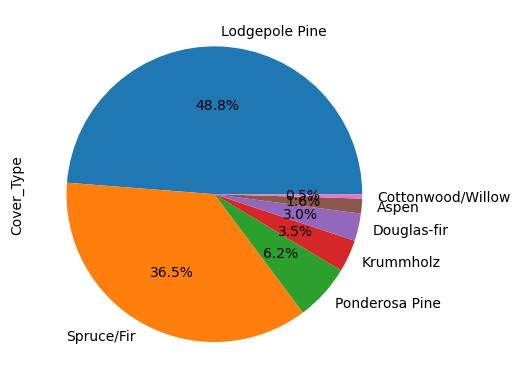

In [ ]:
Cover_Type_percentages = df['Cover_Type'].value_counts(normalize=True) * 100

Cover_Type_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.show()

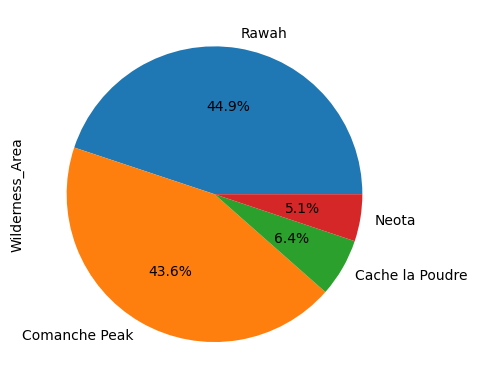

In [ ]:
Wilderness_Area_percentages = df['Wilderness_Area'].value_counts(normalize=True) * 100

Wilderness_Area_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.show()

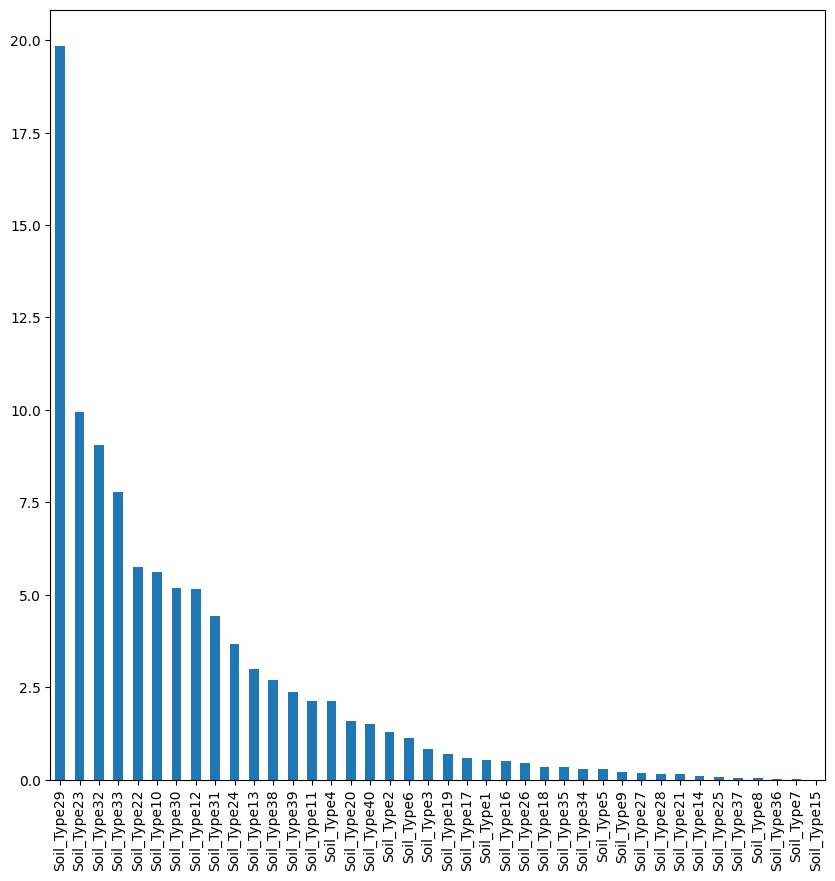

In [ ]:
plt.figure(figsize=(10, 10))
Soil_Type_percentages = df['Soil_Type'].value_counts(normalize=True) * 100
Soil_Type_percentages.plot(kind='bar')
plt.show()

<Axes: xlabel='Wilderness_Area', ylabel='count'>

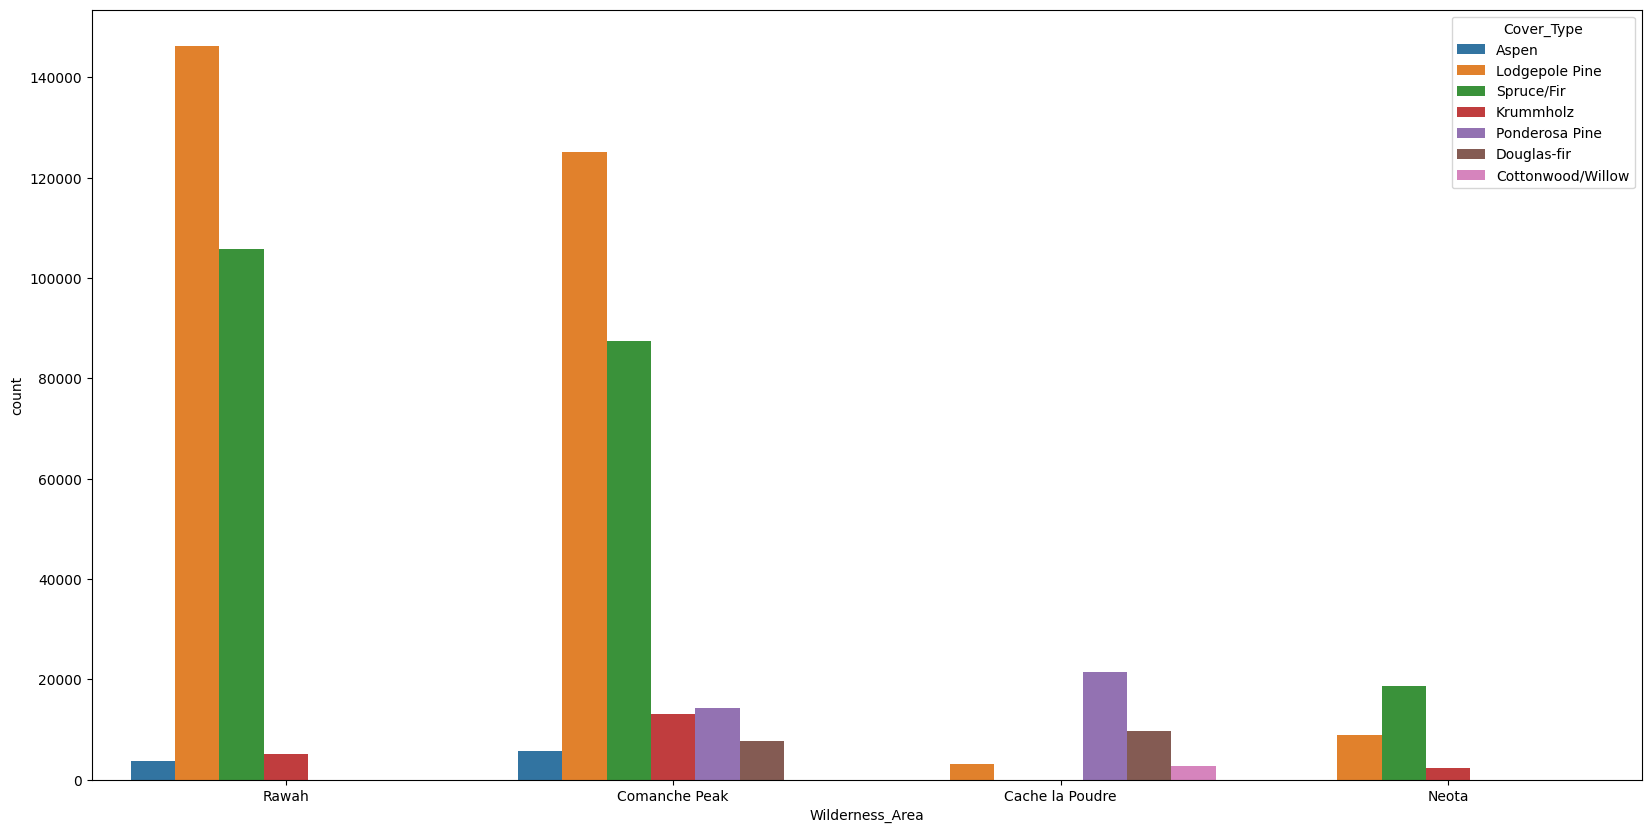

In [ ]:
# phân bổ các loại cây theo khu vực
plt.figure(figsize=(20, 10))
sns.countplot(x='Wilderness_Area', hue='Cover_Type', data=df)

<Axes: xlabel='Elevation', ylabel='count'>

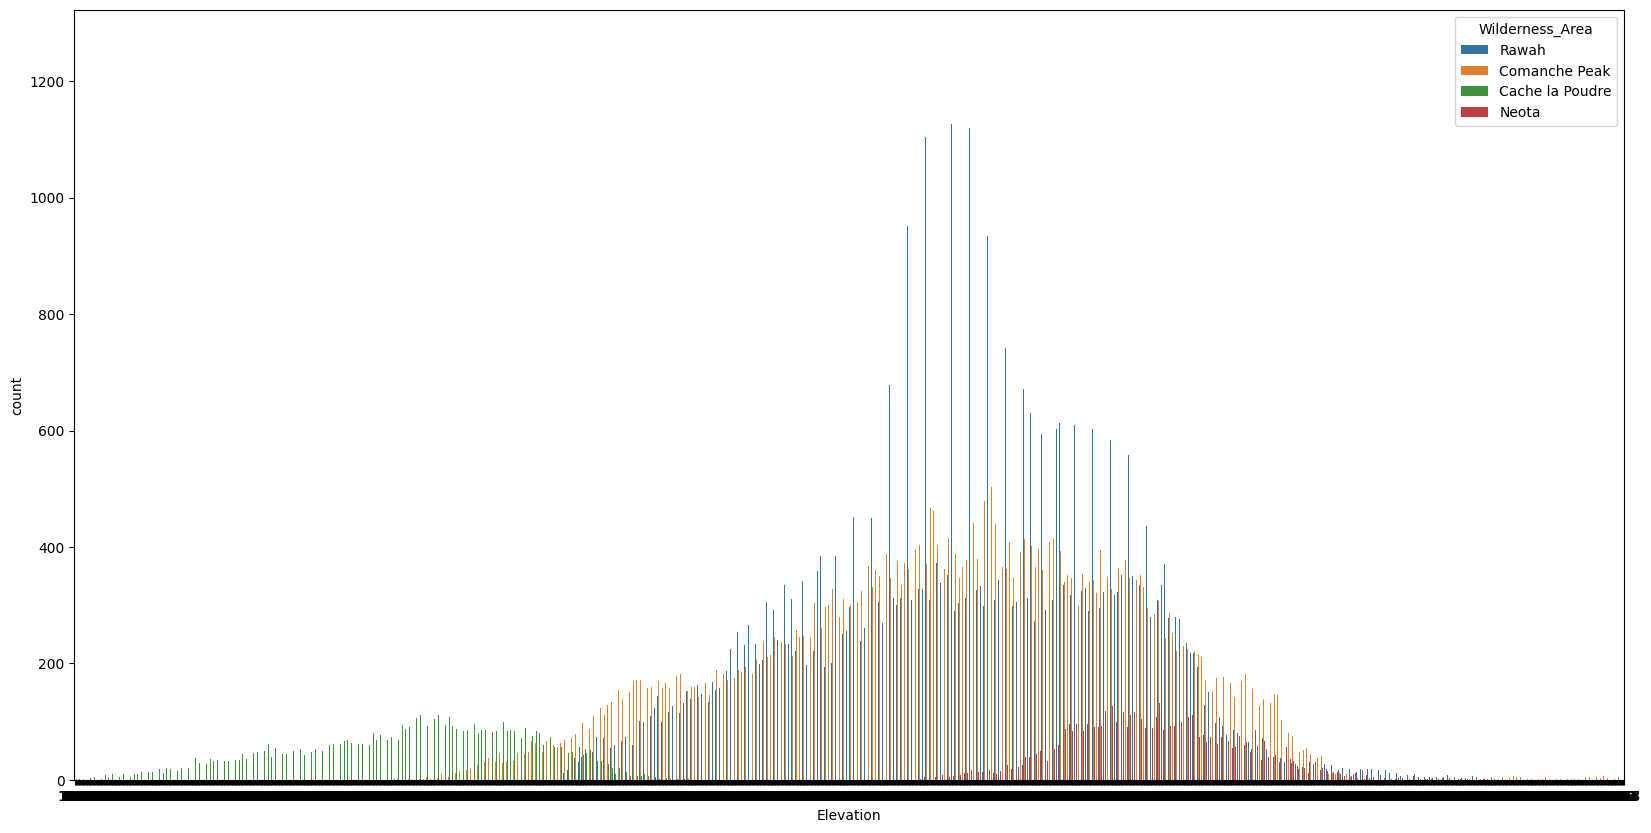

In [ ]:
# độ cao phân bổ của từng khu vực
plt.figure(figsize=(20, 10))
sns.countplot(x='Elevation', hue='Wilderness_Area', data=df)

<Axes: xlabel='Aspect', ylabel='count'>

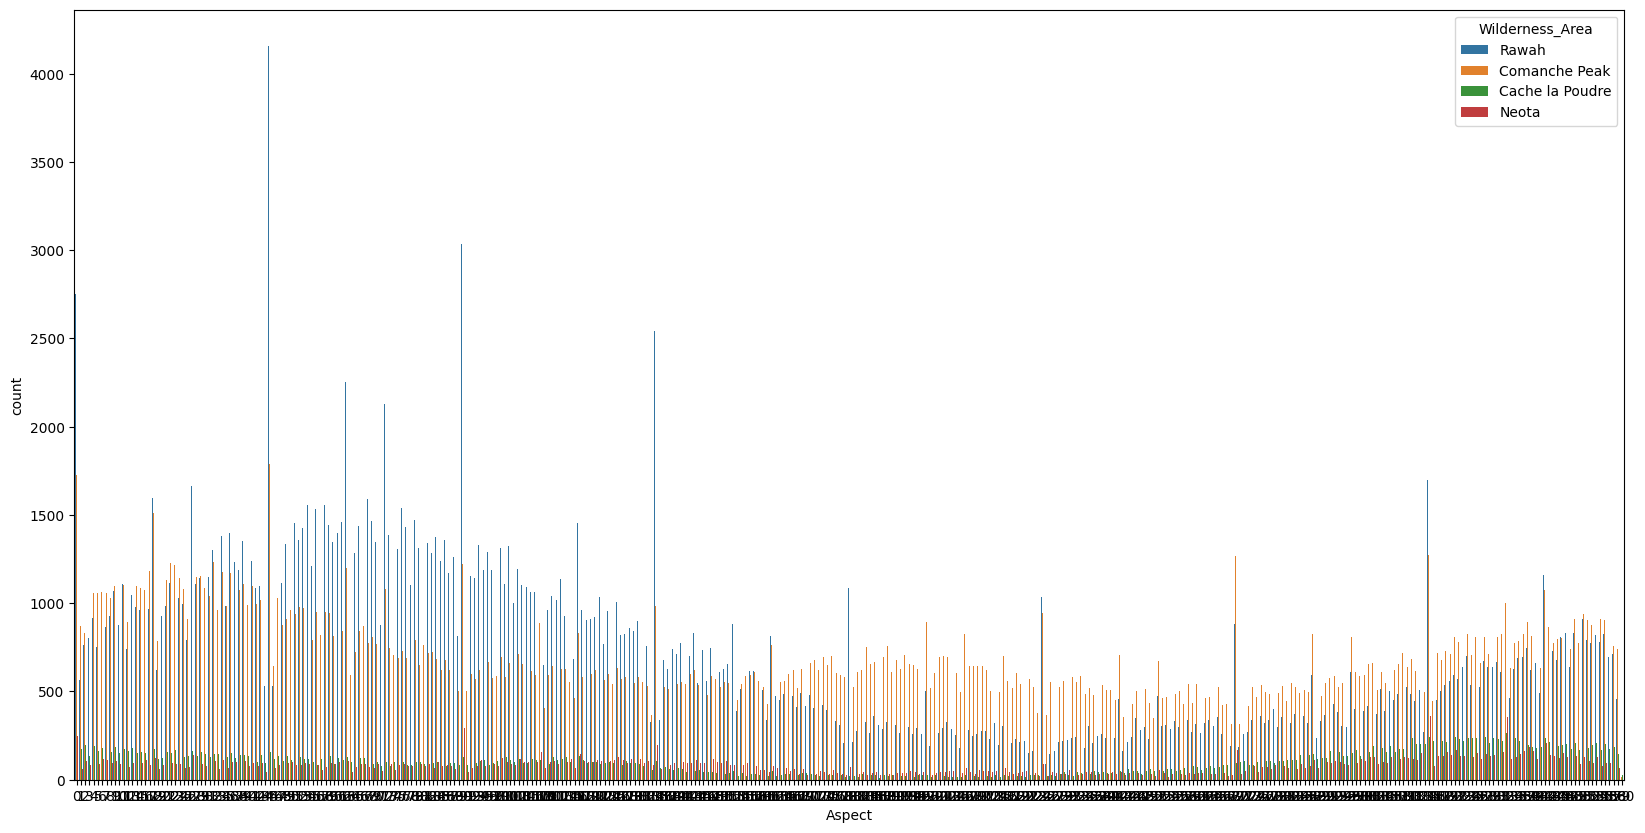

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Aspect', hue='Wilderness_Area', data=df)

<Axes: xlabel='Aspect', ylabel='count'>

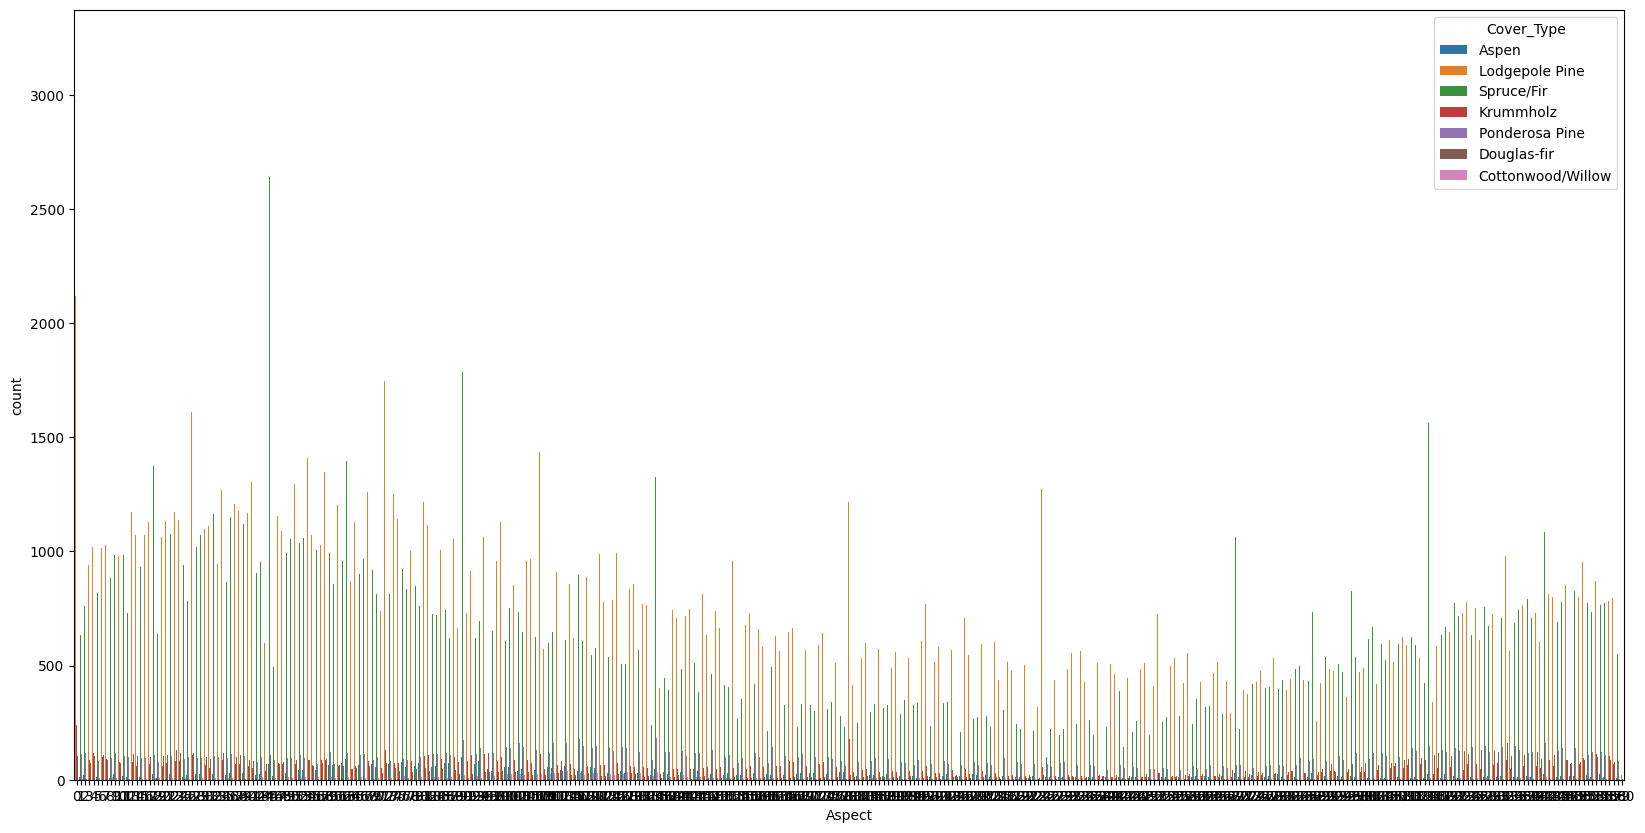

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Aspect', hue='Cover_Type', data=df)

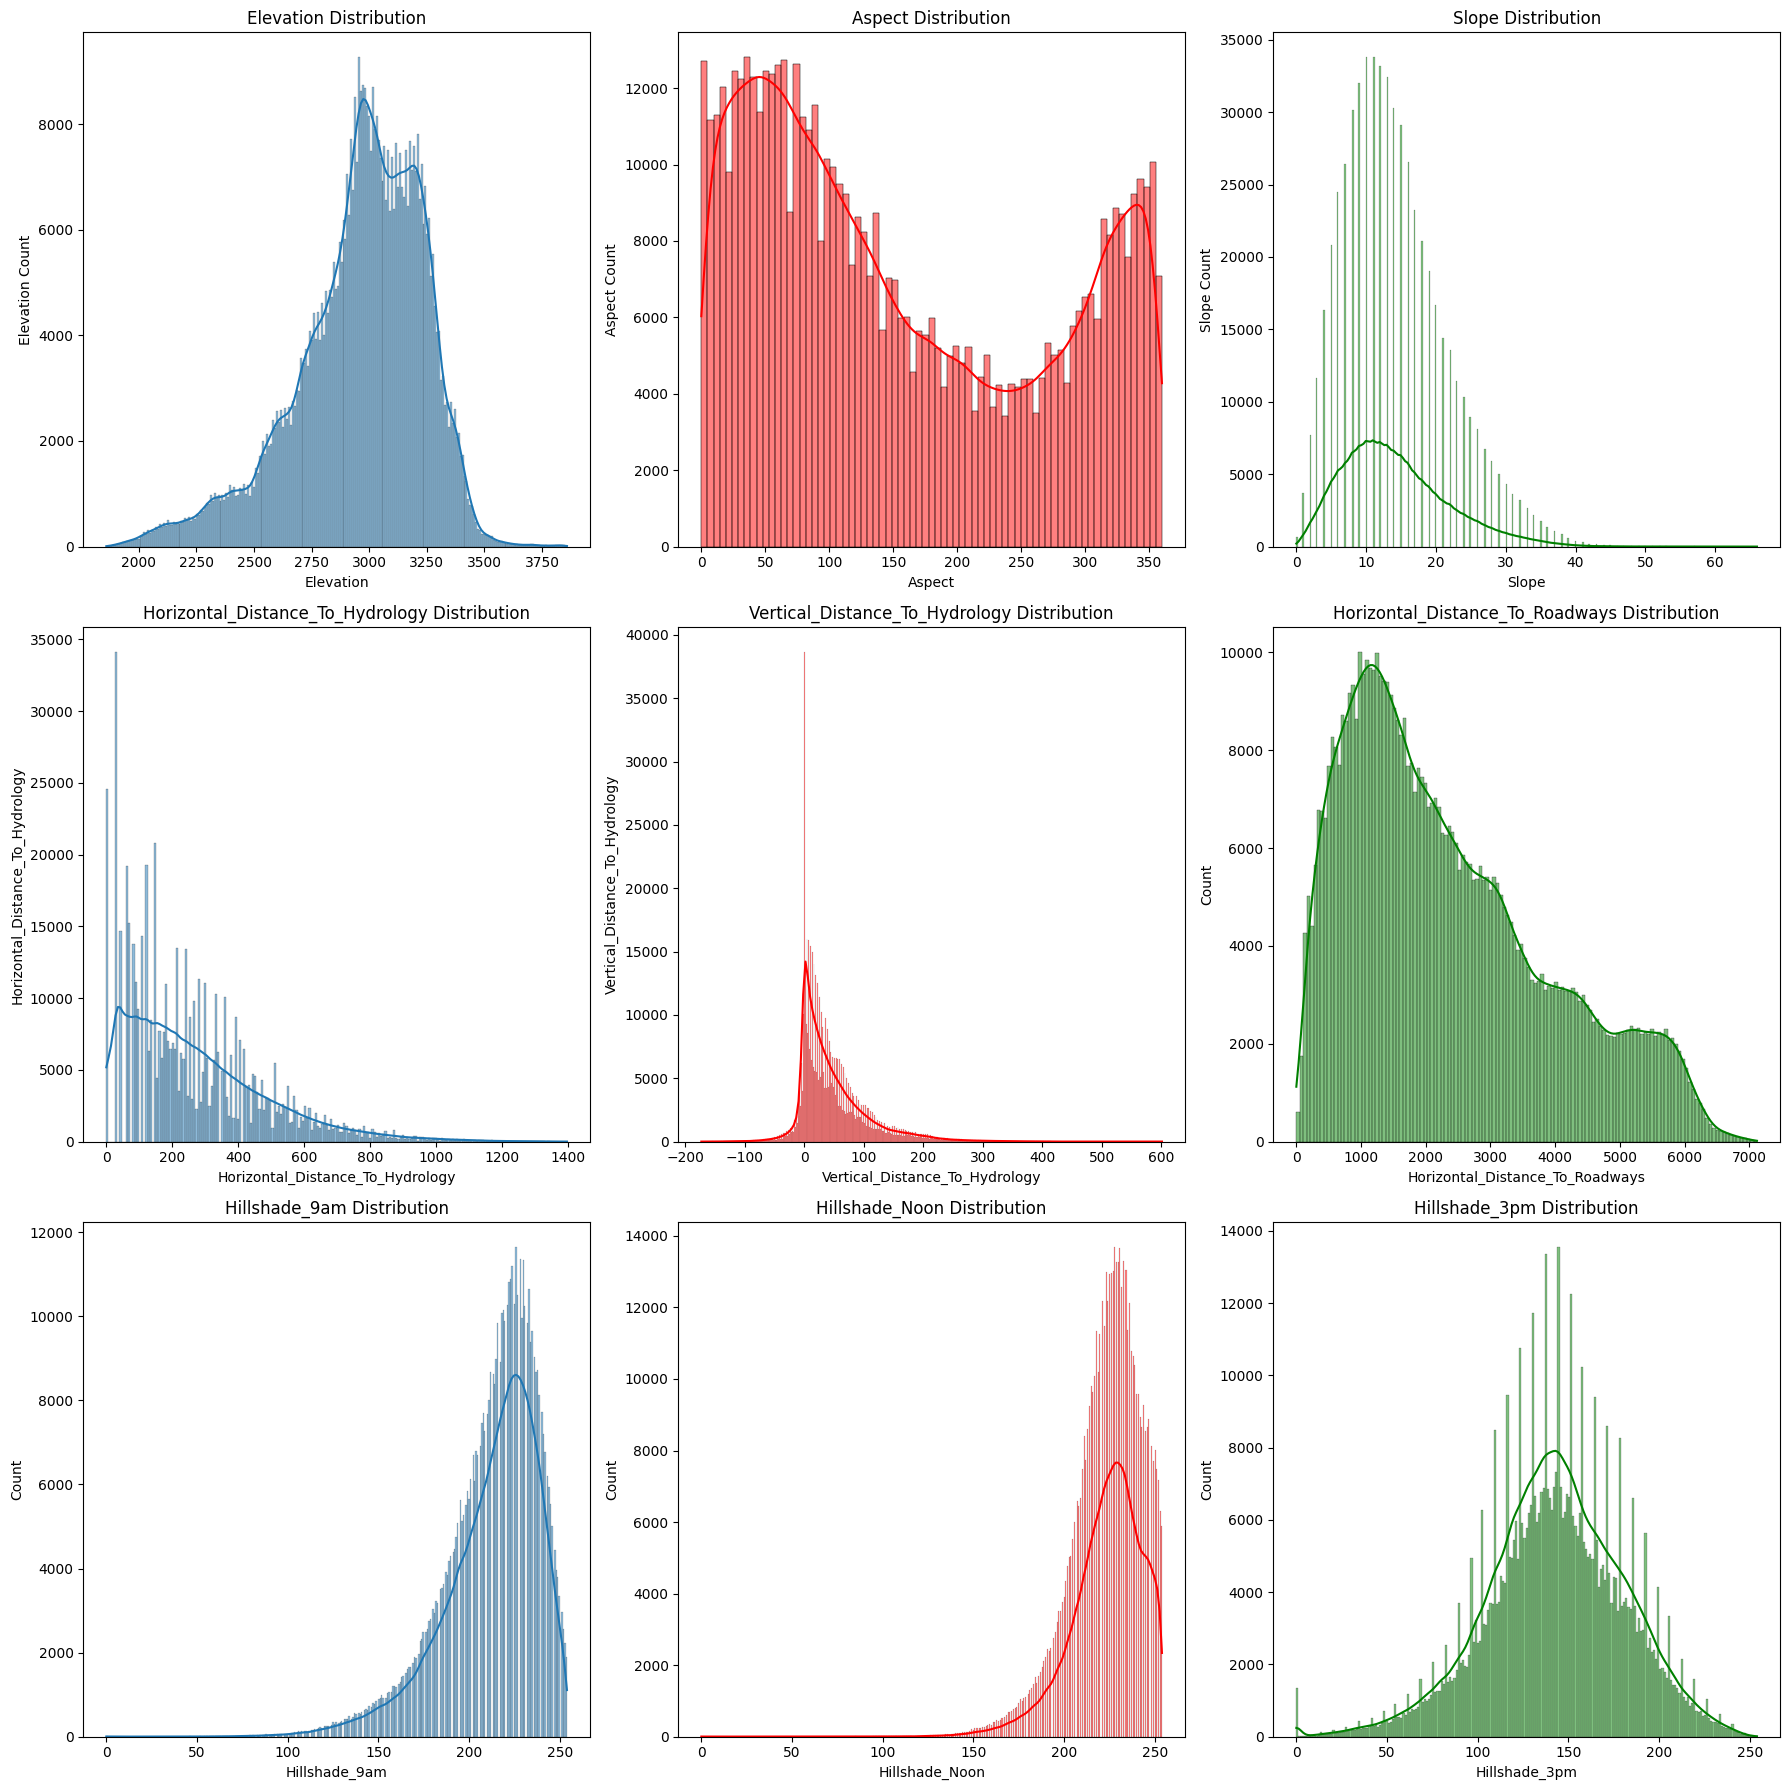

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

sns.histplot(df['Elevation'], ax=axes[0, 0], kde=True).set_title('Elevation Distribution')
axes[0, 0].set_ylabel('Elevation Count')

sns.histplot(df['Aspect'], color="r", ax=axes[0, 1], kde=True).set_title('Aspect Distribution')
axes[0, 1].set_ylabel('Aspect Count')

sns.histplot(df['Slope'], color="g", ax=axes[0, 2], kde=True).set_title('Slope Distribution')
axes[0, 2].set_ylabel('Slope Count')

sns.histplot(df['Horizontal_Distance_To_Hydrology'], ax=axes[1, 0], kde=True).set_title('Horizontal_Distance_To_Hydrology Distribution')
axes[1, 0].set_ylabel('Horizontal_Distance_To_Hydrology')

sns.histplot(df['Vertical_Distance_To_Hydrology'], color="r", ax=axes[1, 1], kde=True).set_title('Vertical_Distance_To_Hydrology Distribution')
axes[1, 1].set_ylabel('Vertical_Distance_To_Hydrology')

sns.histplot(df['Horizontal_Distance_To_Roadways'], color="g", ax=axes[1, 2], kde=True).set_title('Horizontal_Distance_To_Roadways Distribution')
axes[1, 2].set_ylabel('Count')

sns.histplot(df['Hillshade_9am'], ax=axes[2, 0], kde=True).set_title('Hillshade_9am Distribution')
axes[2, 0].set_ylabel('Count')

sns.histplot(df['Hillshade_Noon'], color="r", ax=axes[2, 1], kde=True).set_title('Hillshade_Noon Distribution')
axes[2, 1].set_ylabel('Count')

sns.histplot(df['Hillshade_3pm'], color="g", ax=axes[2, 2], kde=True).set_title('Hillshade_3pm Distribution')
axes[2, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

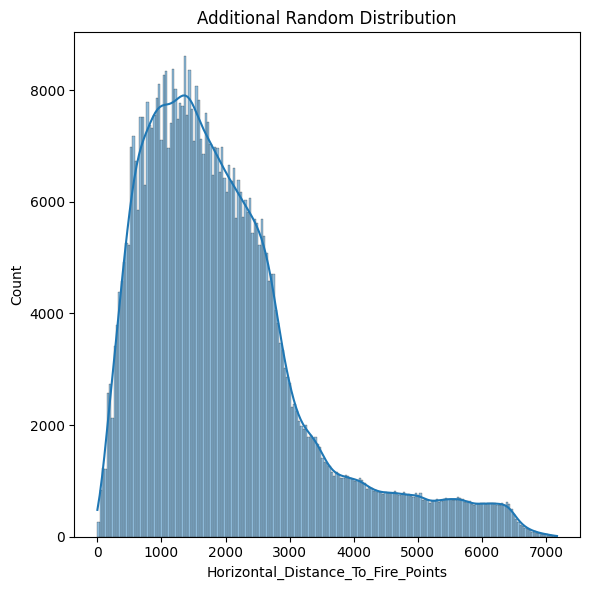

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.histplot(df['Horizontal_Distance_To_Fire_Points'], ax=ax, kde=True).set_title('Additional Random Distribution')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
  # df.hist(figsize=(10, 10))
  # plt.show()

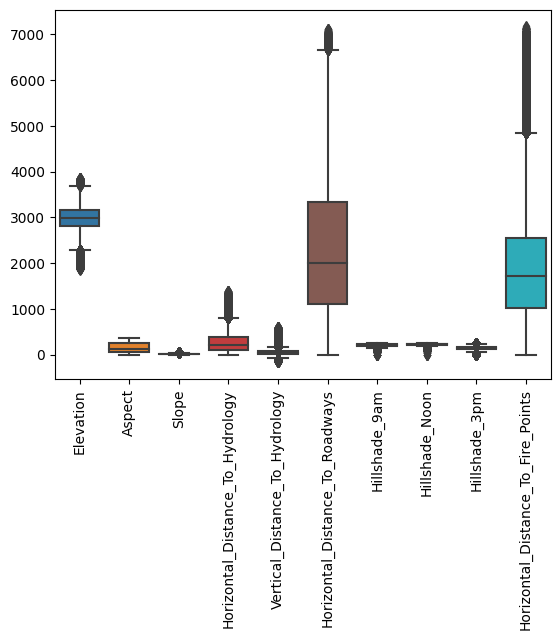

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

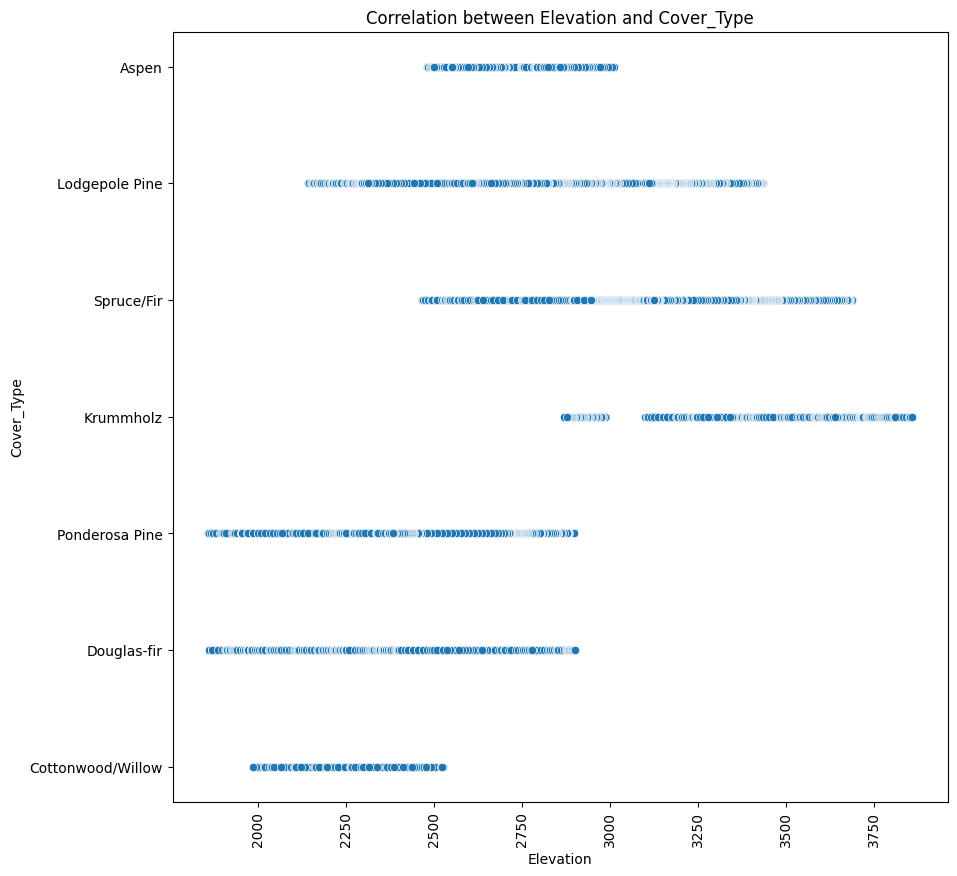

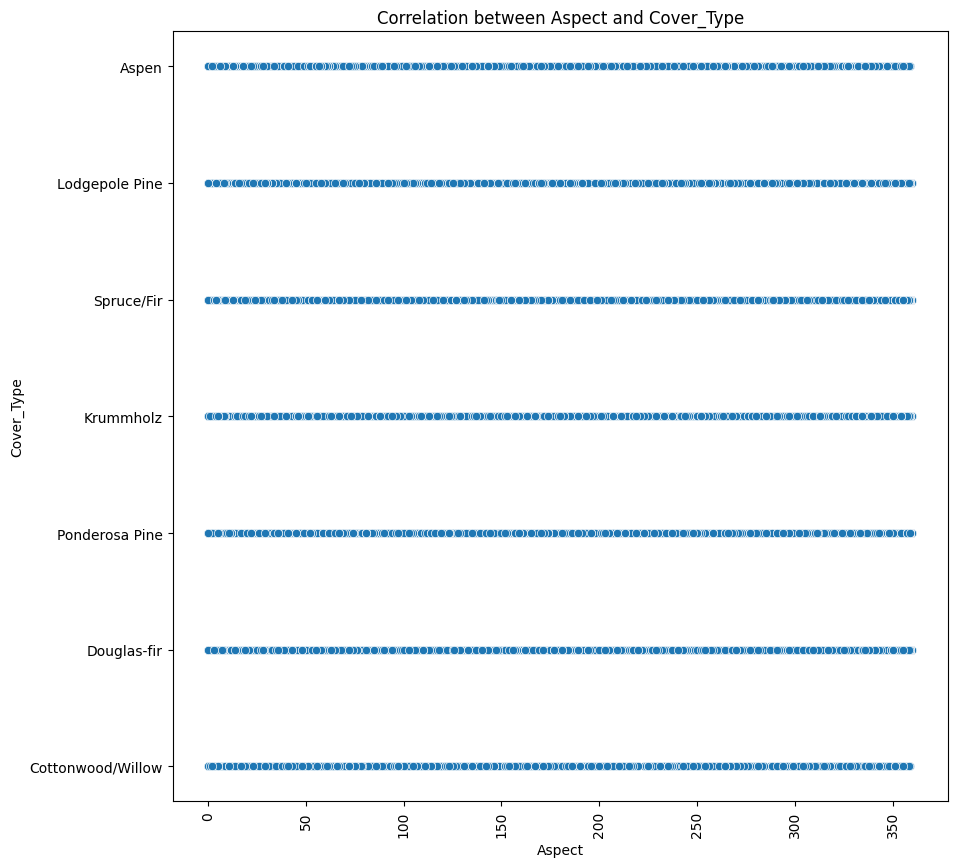

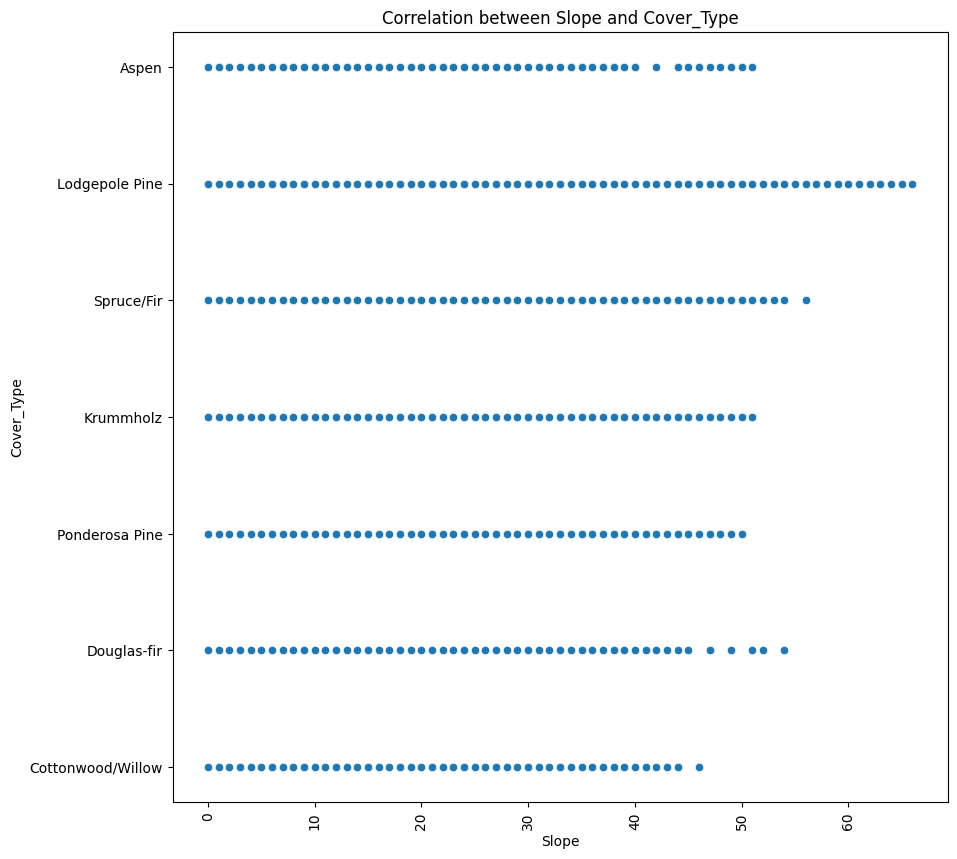

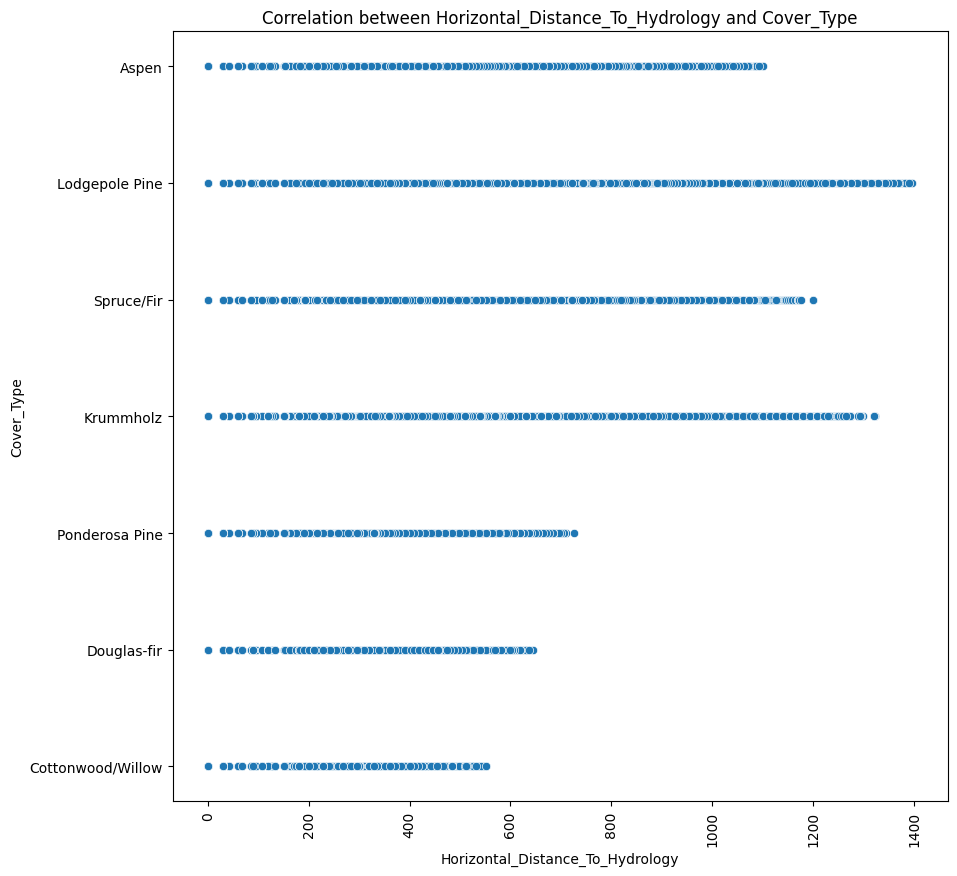

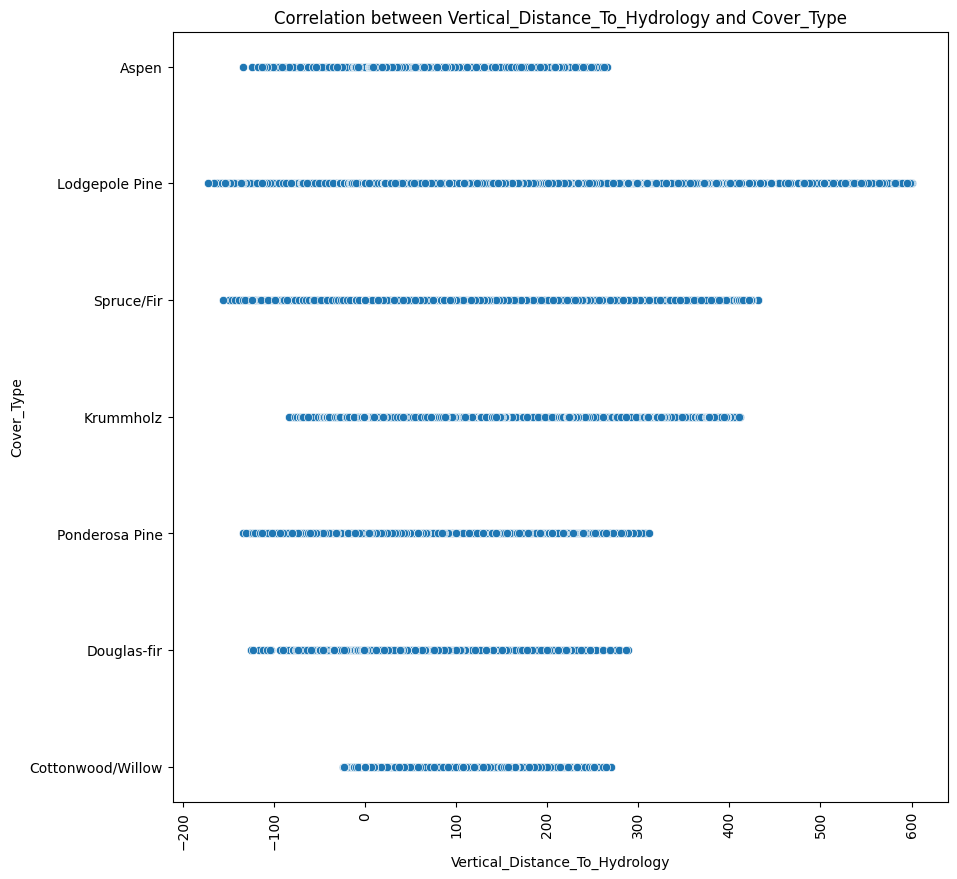

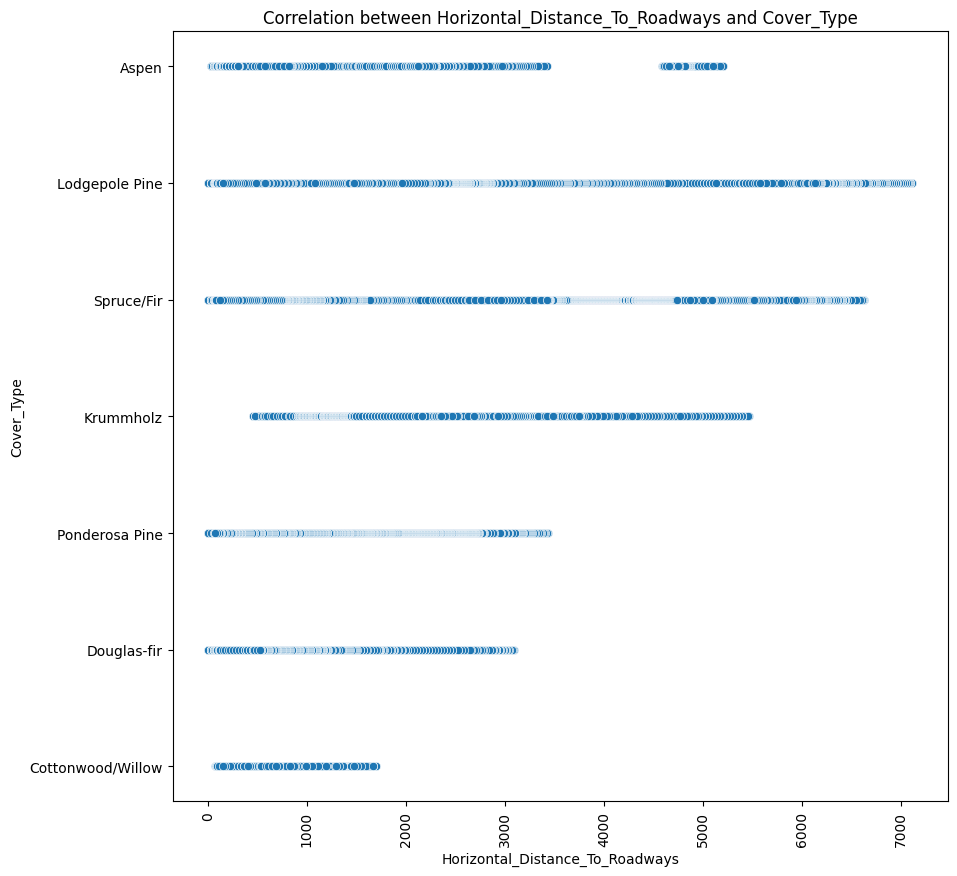

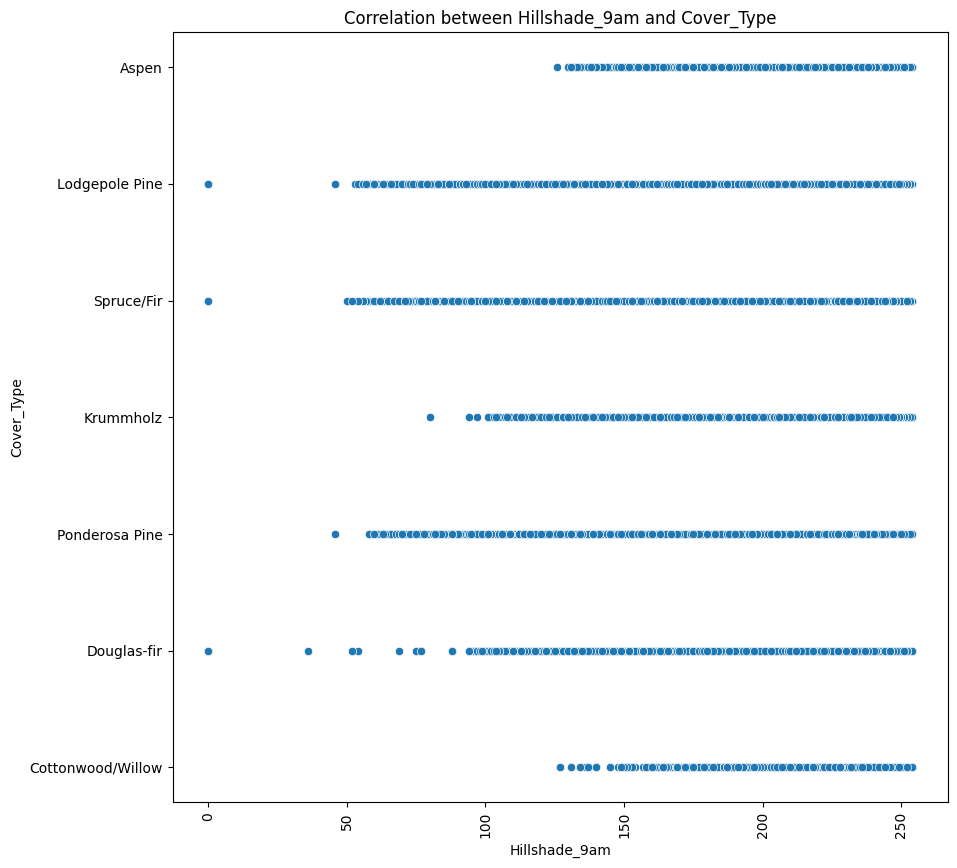

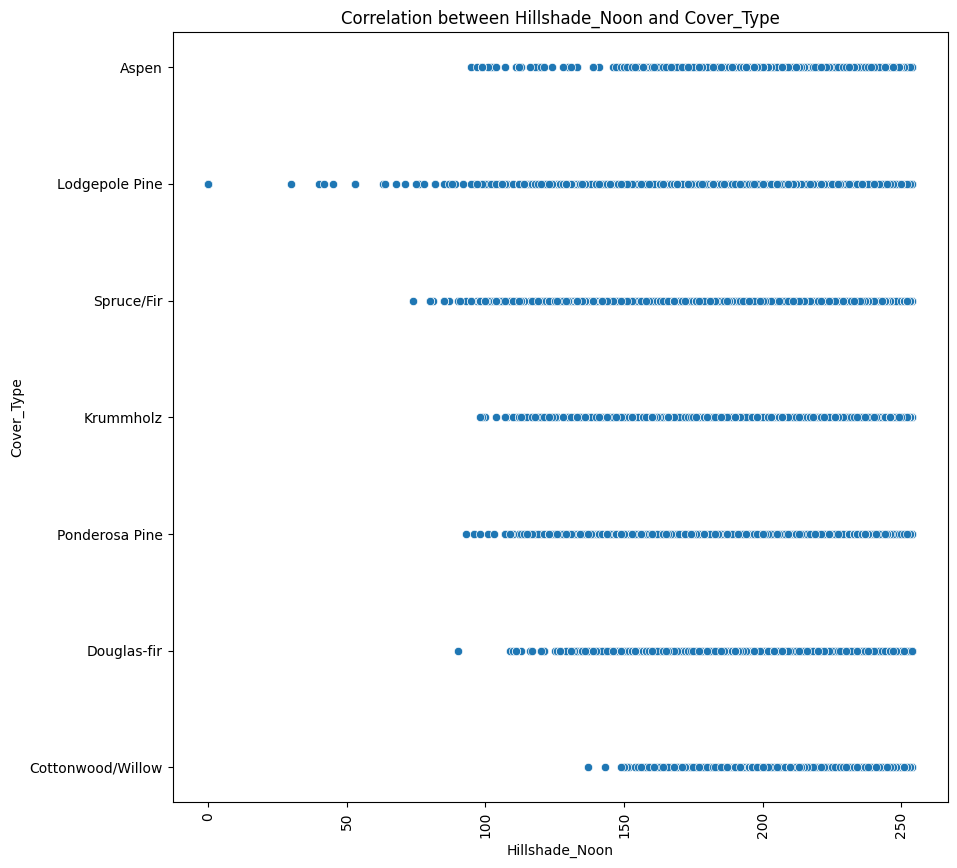

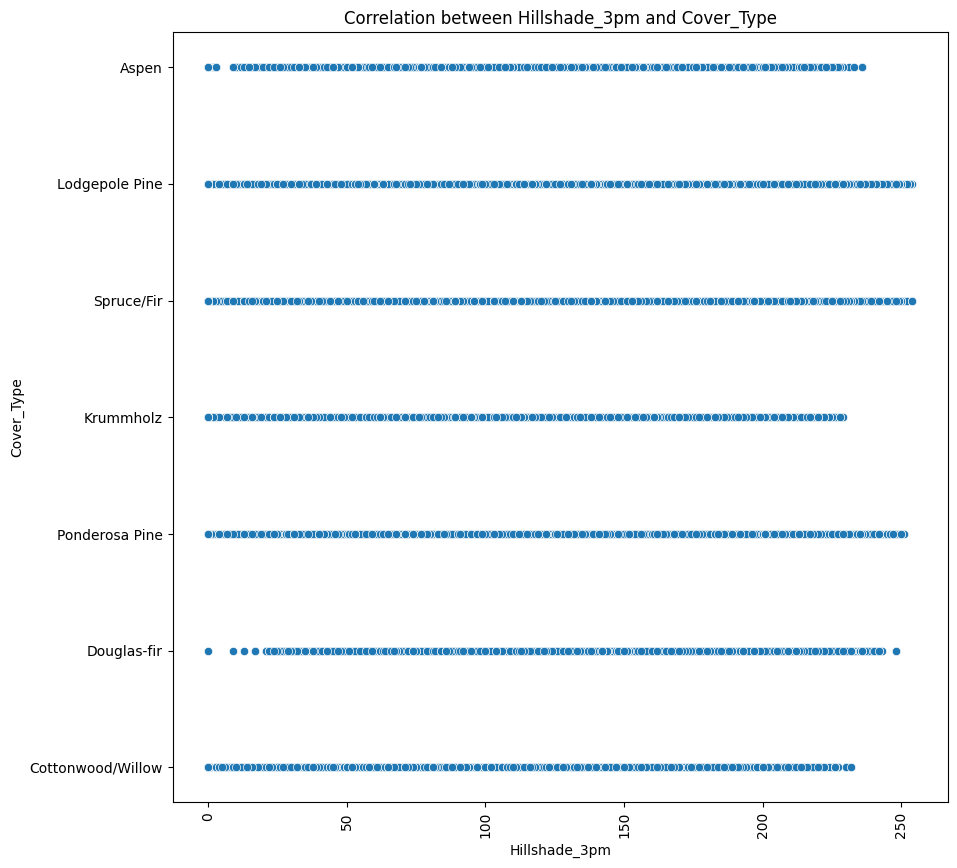

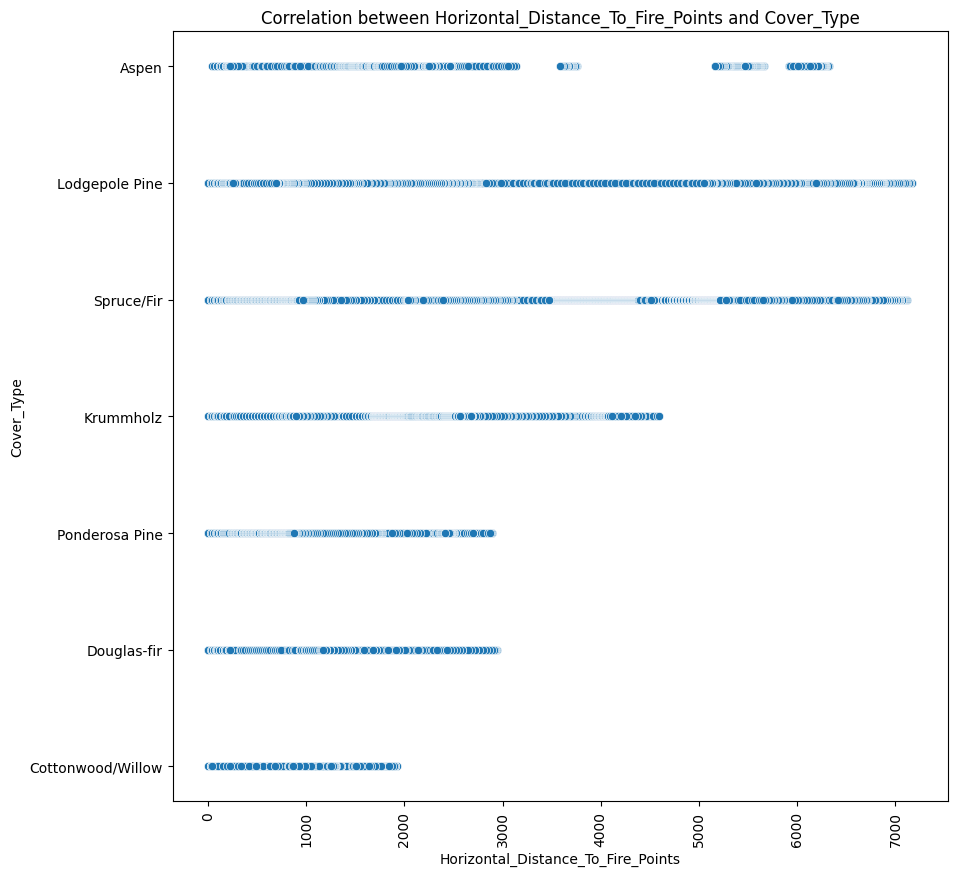

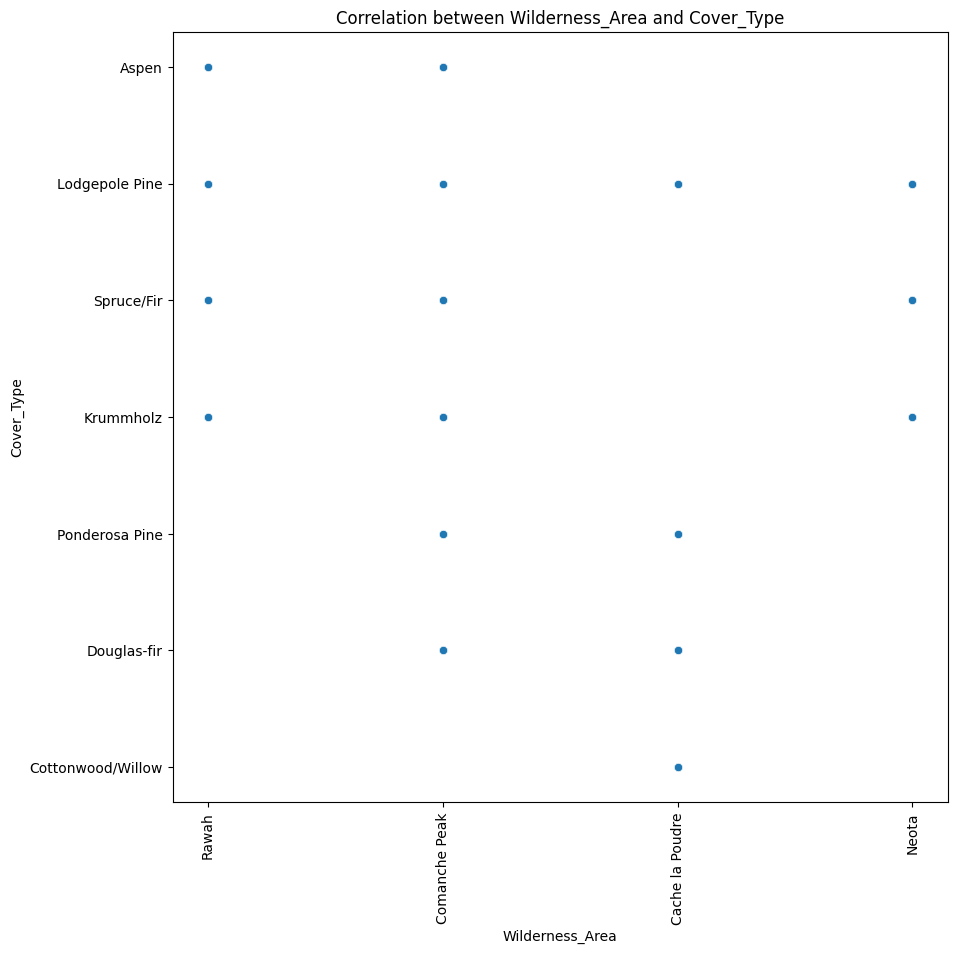

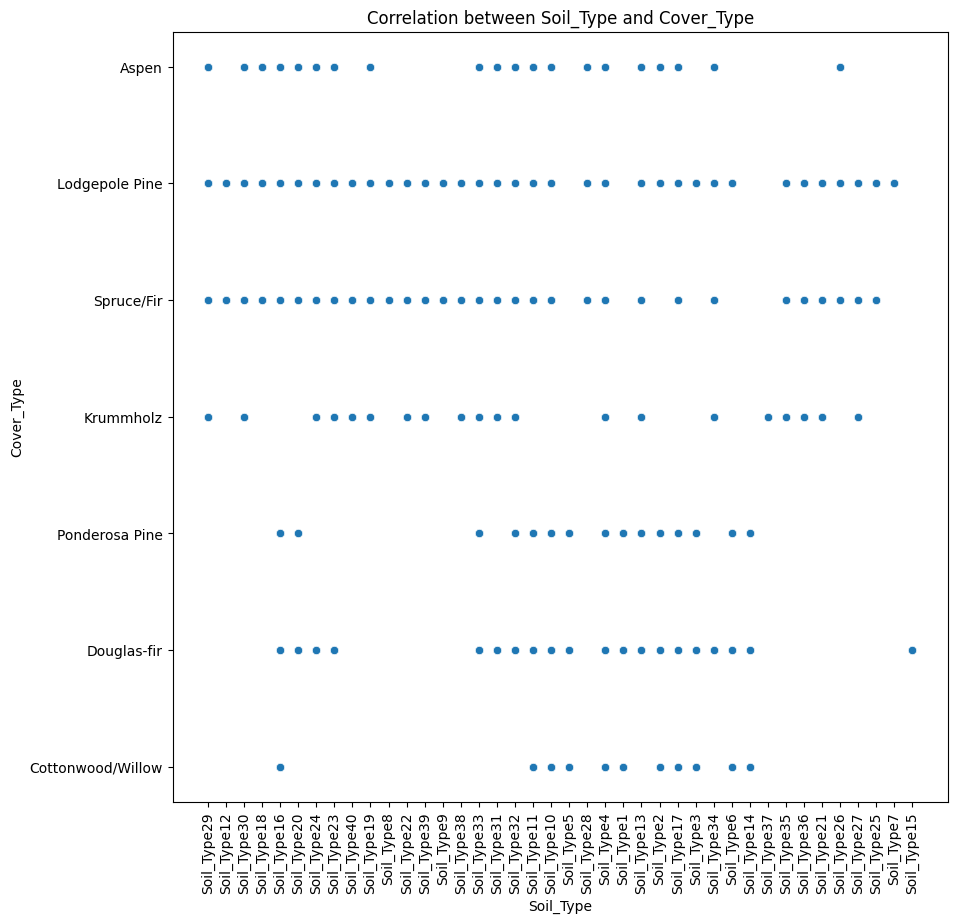

In [ ]:
for column in df.columns:
    if column != 'Cover_Type':
        plt.figure(figsize=(10, 10))
        sns.scatterplot(data=df, x=column, y='Cover_Type')
        plt.title(f'Correlation between {column} and Cover_Type')
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
# plt.show()

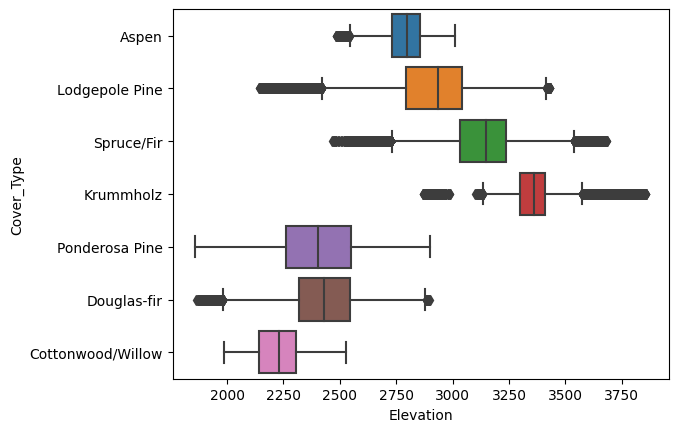

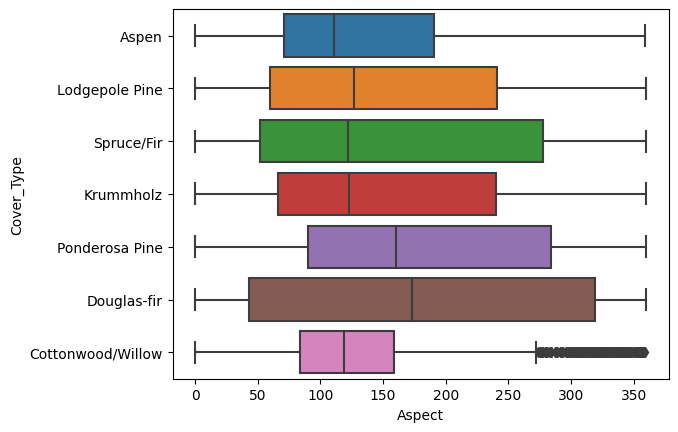

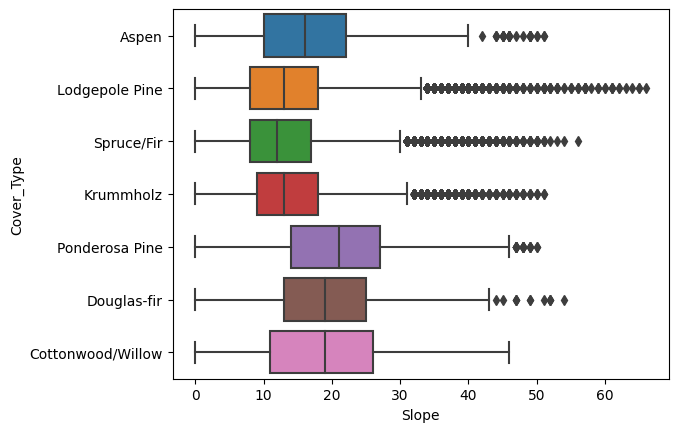

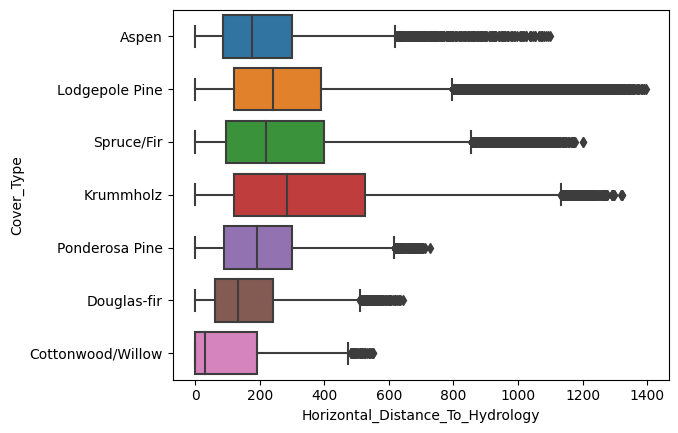

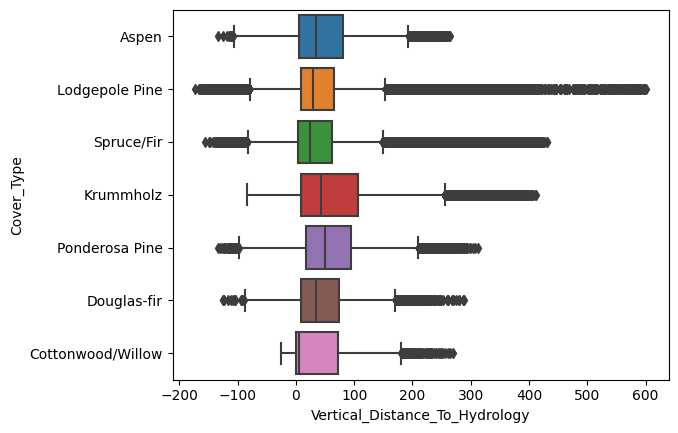

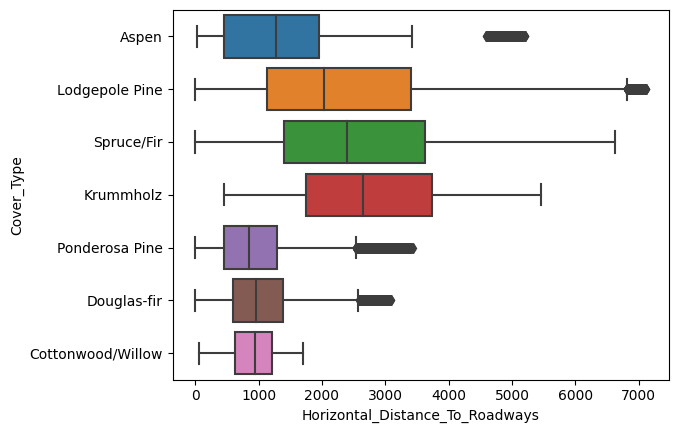

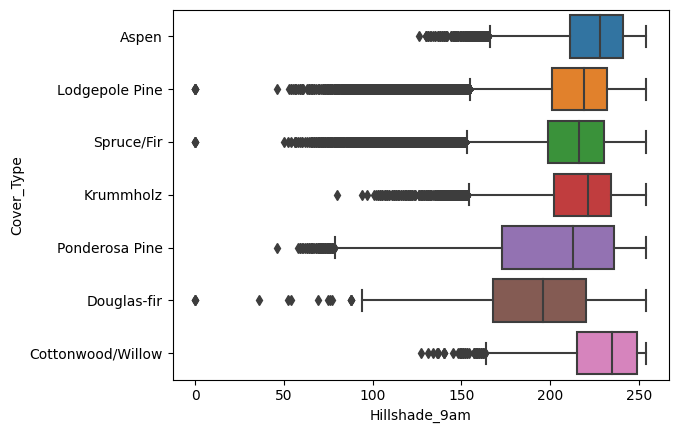

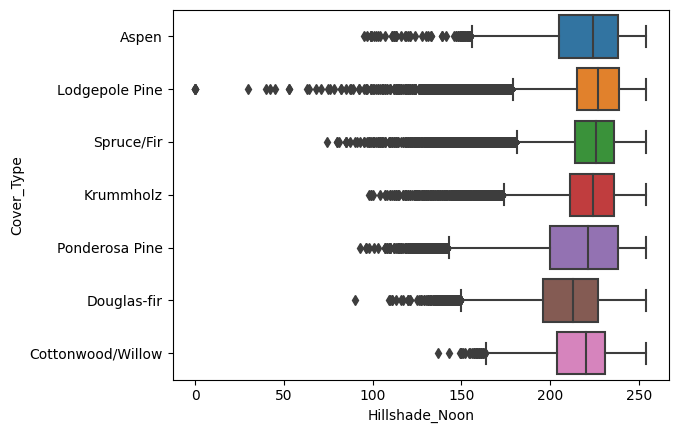

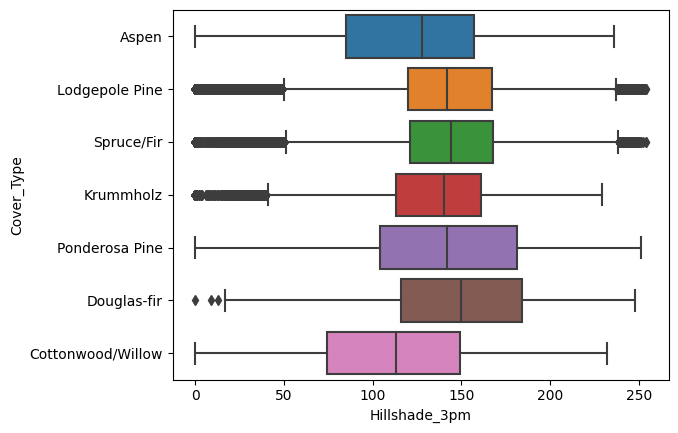

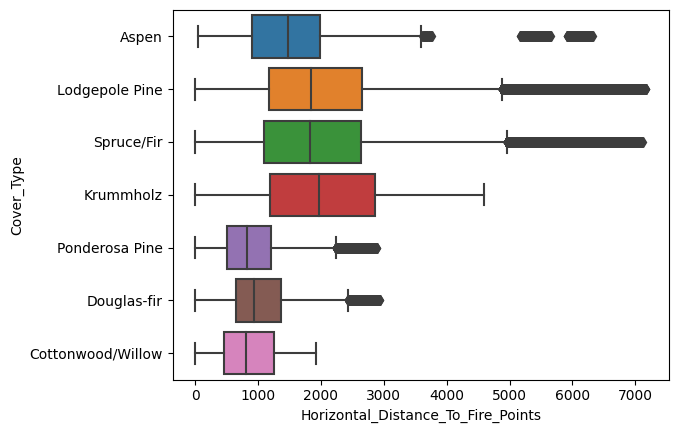

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
  if column != 'Cover_Type':
    sns.boxplot(x=col, y='Cover_Type', data=df)
    plt.show()

<ipython-input-76-ffec603f82ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


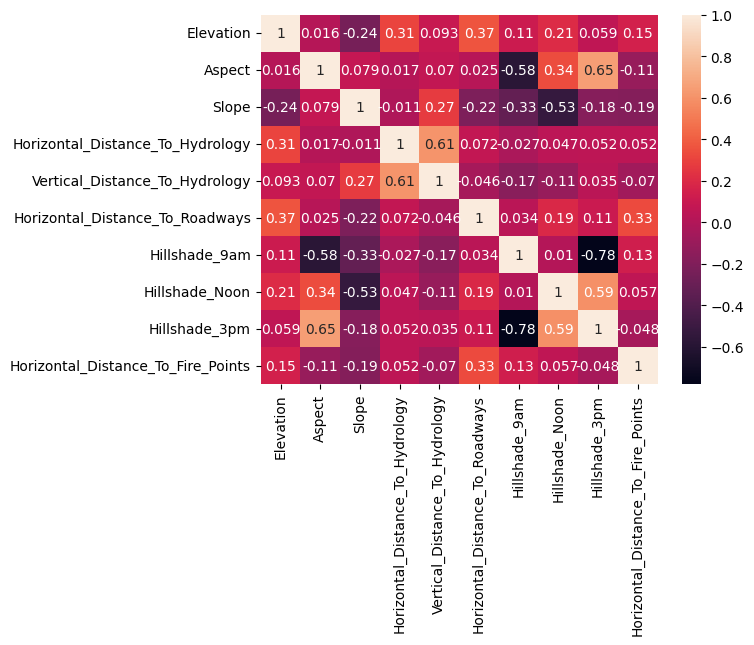

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Nhận Xét Sự Tương Quan**

Sau khi xây dựng các biểu đồ để tìm sự tương quan giữa các thuộc tính trong tập dữ liệu, ta thấy rằng thuộc tính Aspect có sự trải đều cho toàn bộ các Cover_Type, giá trị ngoại lệ thấp và nó cũng gây nên việc làm cho độ tương quan đối với 1 số thuộc tính khác cao. Vì vậy ta có thể nhận xét rằng có thể Aspect sẽ tác động rất nhỏ đến việc xây dựng các mô hình dự đoán vì vậy việc loại bỏ có thể là khả thi.

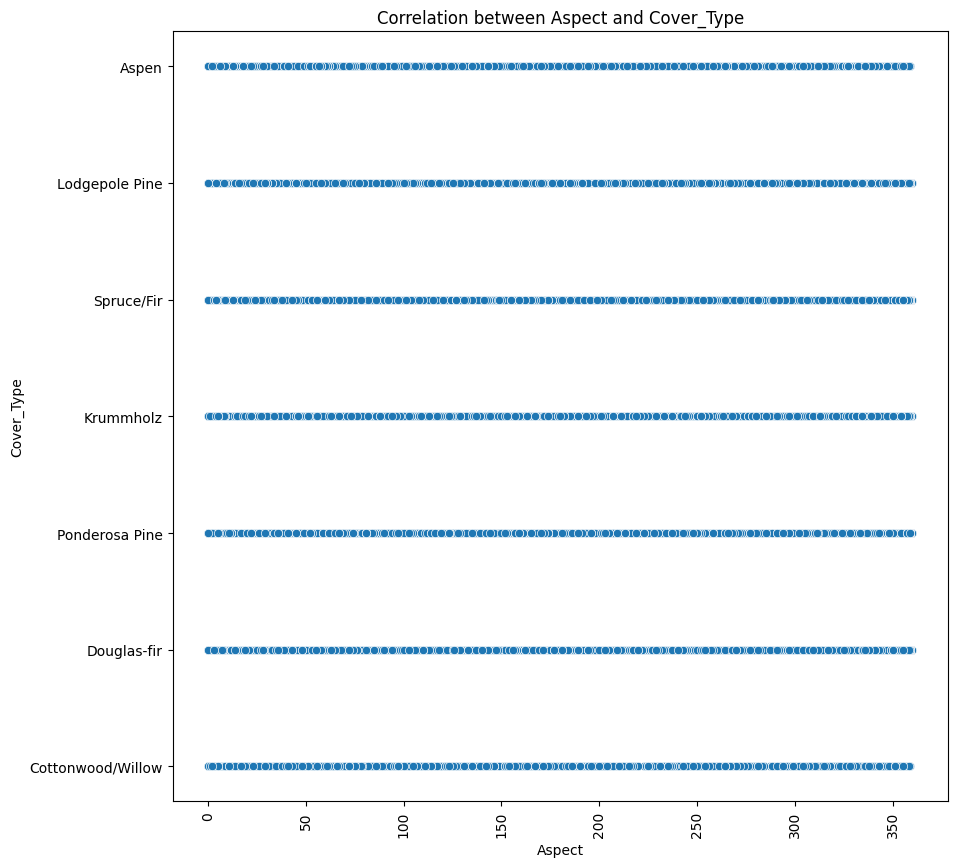

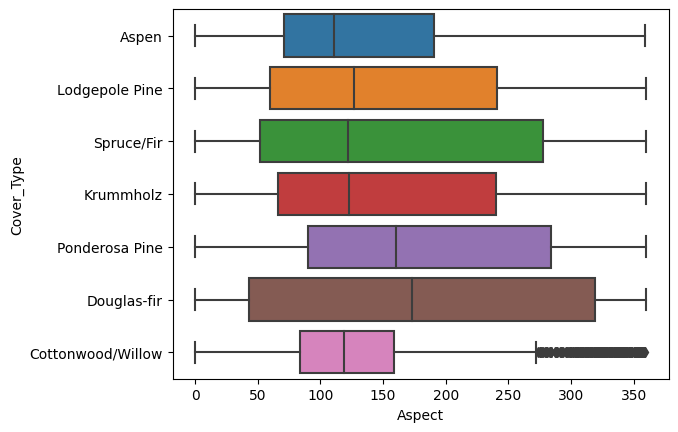

In [ ]:
df = df.drop('Aspect', axis=1)
df

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,3,258,0,510,221,232,148,6279,Aspen,Rawah,Soil_Type29
1,2590,2,212,-6,390,220,235,151,6225,Aspen,Rawah,Soil_Type29
2,2804,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah,Soil_Type12
3,2785,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah,Soil_Type30
4,2595,2,153,-1,391,220,234,150,6172,Aspen,Rawah,Soil_Type29
...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,20,85,17,108,240,237,118,837,Ponderosa Pine,Comanche Peak,Soil_Type2
581008,2391,19,67,12,95,240,237,119,845,Ponderosa Pine,Comanche Peak,Soil_Type2
581009,2386,17,60,7,90,236,241,130,854,Ponderosa Pine,Comanche Peak,Soil_Type2
581010,2384,15,60,5,90,230,245,143,864,Ponderosa Pine,Comanche Peak,Soil_Type2


Tiếp theo, ta nhận thấy rằng, Hillshade_9am và Hillshade_3pm có sự tương quan cực kỳ thấp, có 2 lựa chọn thứ nhất là ta sẽ loại bỏ cả 2 cột thứ 2 ta sẽ tính trung bình của 2 cột đó và xét độ tương quan với các thuộc tính còn lại.

<ipython-input-78-b5ebf043a1fc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


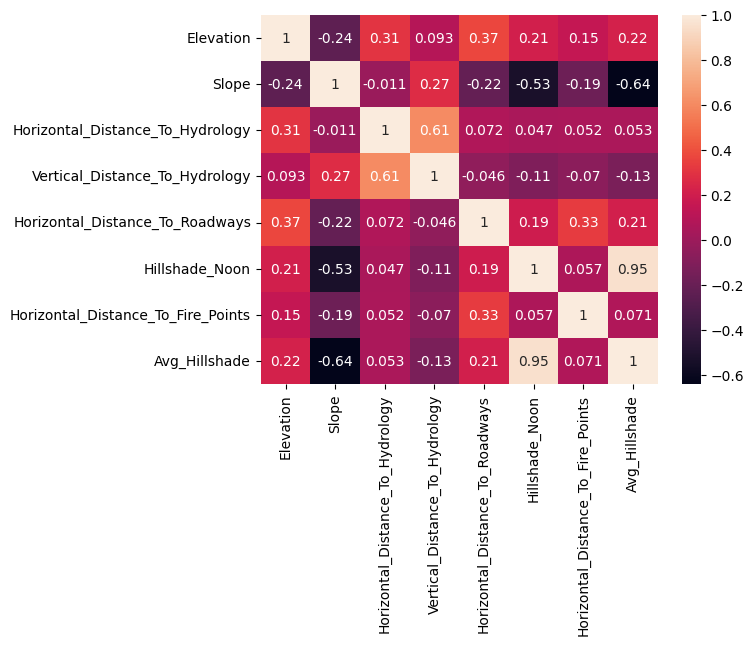

In [ ]:
df['Avg_Hillshade'] = df[['Hillshade_9am', 'Hillshade_3pm']].mean(axis=1)
df = df.drop(['Hillshade_3pm', 'Hillshade_9am'], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Lúc này độ tương quan giữa Avg_Hillshade và Hillshade_Noon được đẩy lên mức tương quan cực kỳ cao vì vậy ta lại tiếp tục tính trung bình của Hillshade

<ipython-input-79-27cb7d23f0b1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


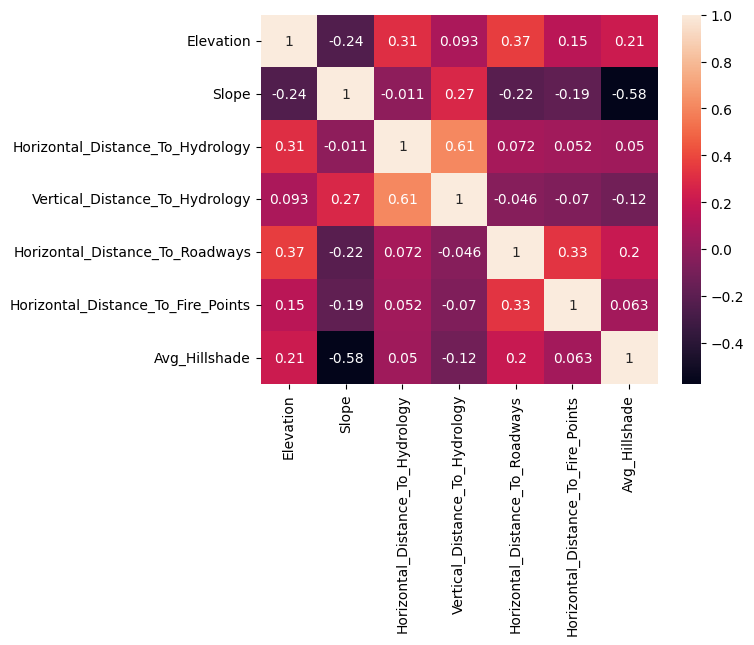

In [ ]:
df['Avg_Hillshade'] = df[['Avg_Hillshade', 'Hillshade_Noon']].mean(axis=1)
df = df.drop(['Hillshade_Noon'], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Lúc này mức tương quan của tập dữ liệu đã ở mức chấp nhận được, nhưng ta vẫn thấy Vertical_Distance_To_Hydrology và Horizontal_Distance_To_Roadways có mức tương quan cũng khá cao vì vậy ta có thể gộp 2 cột thành một bằng cách tính khoảng cách giữa hai nguồn bằng công thức tính khoảng cách Euclid

<ipython-input-80-aaeffba35b95>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


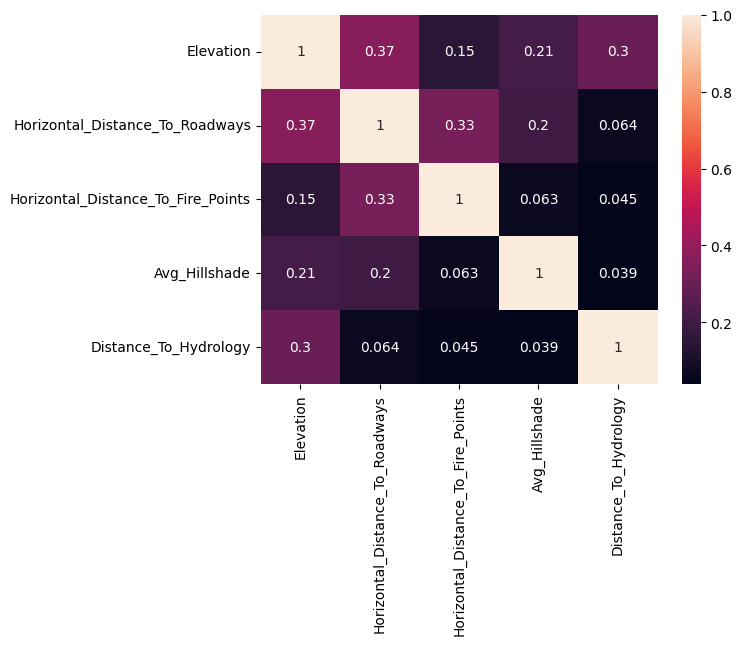

In [ ]:
df["Distance_To_Hydrology"] = ( (df["Horizontal_Distance_To_Hydrology"] ** 2) + (df["Vertical_Distance_To_Hydrology"] ** 2) ) ** (0.5)
df = df.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1)
df = df.drop(["Slope"], axis=1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Lúc này mức tương quan đã ở mức chấp nhận, ta có thể sang bước Scale

In [ ]:
df

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type,Avg_Hillshade,Distance_To_Hydrology
0,2596,510,6279,Aspen,Rawah,Soil_Type29,208.25,258.000000
1,2590,390,6225,Aspen,Rawah,Soil_Type29,210.25,212.084889
2,2804,3180,6121,Lodgepole Pine,Rawah,Soil_Type12,211.25,275.769832
3,2785,3090,6211,Lodgepole Pine,Rawah,Soil_Type30,209.00,269.235956
4,2595,391,6172,Aspen,Rawah,Soil_Type29,209.50,153.003268
...,...,...,...,...,...,...,...,...
581007,2396,108,837,Ponderosa Pine,Comanche Peak,Soil_Type2,208.00,86.683332
581008,2391,95,845,Ponderosa Pine,Comanche Peak,Soil_Type2,208.25,68.066144
581009,2386,90,854,Ponderosa Pine,Comanche Peak,Soil_Type2,212.00,60.406953
581010,2384,90,864,Ponderosa Pine,Comanche Peak,Soil_Type2,215.75,60.207973


In [ ]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['Cover_Type', 'Wilderness_Area', 'Soil_Type'], dtype='object')

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Avg_Hillshade',
       'Distance_To_Hydrology'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
number_df = pd.DataFrame(scaler.fit_transform(df[num_cols]))
number_df.columns = num_cols
number_df

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Avg_Hillshade,Distance_To_Hydrology
0,-1.297805,-1.180146,3.246283,0.503202,-0.083233
1,-1.319235,-1.257106,3.205504,0.630241,-0.294777
2,-0.554907,0.532212,3.126965,0.693760,-0.001362
3,-0.622768,0.474492,3.194931,0.550842,-0.031466
4,-1.301377,-1.256464,3.165479,0.582601,-0.566983
...,...,...,...,...,...
581007,-2.012130,-1.437962,-0.863386,0.487323,-0.872538
581008,-2.029988,-1.446299,-0.857345,0.503202,-0.958313
581009,-2.047847,-1.449506,-0.850548,0.741399,-0.993601
581010,-2.054990,-1.449506,-0.842997,0.979596,-0.994518


In [ ]:
from sklearn.preprocessing import LabelEncoder
obj_df = pd.DataFrame()
for col in obj_cols:
  encoder = LabelEncoder()
  obj_df[col] = pd.DataFrame(encoder.fit_transform(df[col]))

obj_df.columns = obj_cols
obj_df

,Cover_Type,Wilderness_Area,Soil_Type
0,0,3,21
1,0,3,21
2,4,3,3
3,4,3,23
4,0,3,21
...,...,...,...
581007,5,1,11
581008,5,1,11
581009,5,1,11
581010,5,1,11


In [ ]:
df_train = pd.concat([number_df, obj_df], axis=1, join='inner')
df_train

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Avg_Hillshade,Distance_To_Hydrology,Cover_Type,Wilderness_Area,Soil_Type
0,-1.297805,-1.180146,3.246283,0.503202,-0.083233,0,3,21
1,-1.319235,-1.257106,3.205504,0.630241,-0.294777,0,3,21
2,-0.554907,0.532212,3.126965,0.693760,-0.001362,4,3,3
3,-0.622768,0.474492,3.194931,0.550842,-0.031466,4,3,23
4,-1.301377,-1.256464,3.165479,0.582601,-0.566983,0,3,21
...,...,...,...,...,...,...,...,...
581007,-2.012130,-1.437962,-0.863386,0.487323,-0.872538,5,1,11
581008,-2.029988,-1.446299,-0.857345,0.503202,-0.958313,5,1,11
581009,-2.047847,-1.449506,-0.850548,0.741399,-0.993601,5,1,11
581010,-2.054990,-1.449506,-0.842997,0.979596,-0.994518,5,1,11
